# **Hotel Booking Fundamental analysis using pandas**

This data article describes two datasets with hotel demand data. 

**One of the hotels (H1) is a resort hotel and the other is a city hotel (H2).** 

Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. 

Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017,including bookings that effectively arrived and bookings that were canceled. 

Since this is hotel real data, all data elements per taining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields.

This database contains real data extracted from the following article:

> Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.


Consider this database and write the appropriate code snippet for the following:



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



**1- Read the database**

In [ ]:
df = pd.read_csv('../input/hotel-booking/hotel_booking.csv')

**2- Check basic database information**

A quick look at the data

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df, hue='hotel', vars=['lead_time', 
       'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights'])

In [ ]:
sns.pairplot(df, hue='hotel', vars=['adults', 
       'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled'])

**3- How many rows does this database have?**

In [ ]:
len(df.index)

**4- Is there data missing? If yes, which column has the most missing data?**

In [ ]:
def isMissing(df):
    
    # Fastest method to check if there are any Missings in a Dataframe
    # Numpy ( np.isnan(df.values).any() ) is 14% faster than df.isnull().any().any()
    
    if df.isna().values.any():
        
        # The frequency of Missings (relative) per column
        temp = df.isna().sum() 
        
        print("The column {} with lowest amount of missing contains {} missings."
              .format(df.count().idxmax(), temp.min()))
        print("The column {} with highest amount of missing contains {} missings."
              .format(df.count().idxmin(), temp.max()))
#         return True
        
    else:
        return 'No Missing in columns!!'
    


isMissing(df)

In [ ]:
plt.figure(figsize=(8, 8), dpi=200)
temp = df.isna().sum()
X = pd.DataFrame({'col': df.columns})
Y = pd.DataFrame({'missing': temp.tolist()})
X = X.join(Y['missing'])
# X
sns.barplot(y=X['col'], x=Y['missing'], data=X)

In [ ]:
col_missing = df.loc[:, df.isnull().any()].columns
df_missing = df[col_missing].isna().sum()
X_missing = pd.DataFrame({'most_missing_col': col_missing.tolist()})
Y_missing = pd.DataFrame({'count': df_missing.tolist()})
X_missing = X_missing.join(Y_missing['count'])
plt.figure(figsize=(6, 4), dpi=100)
sns.barplot(x=X_missing['most_missing_col'], y=Y_missing['count'], data=X_missing)
# sns.countplot(data=X_missing['count'], x=X_missing['most_missing_col'])
plt.title("The columns has the most missing data", fontsize = 20)

*** Extera work**

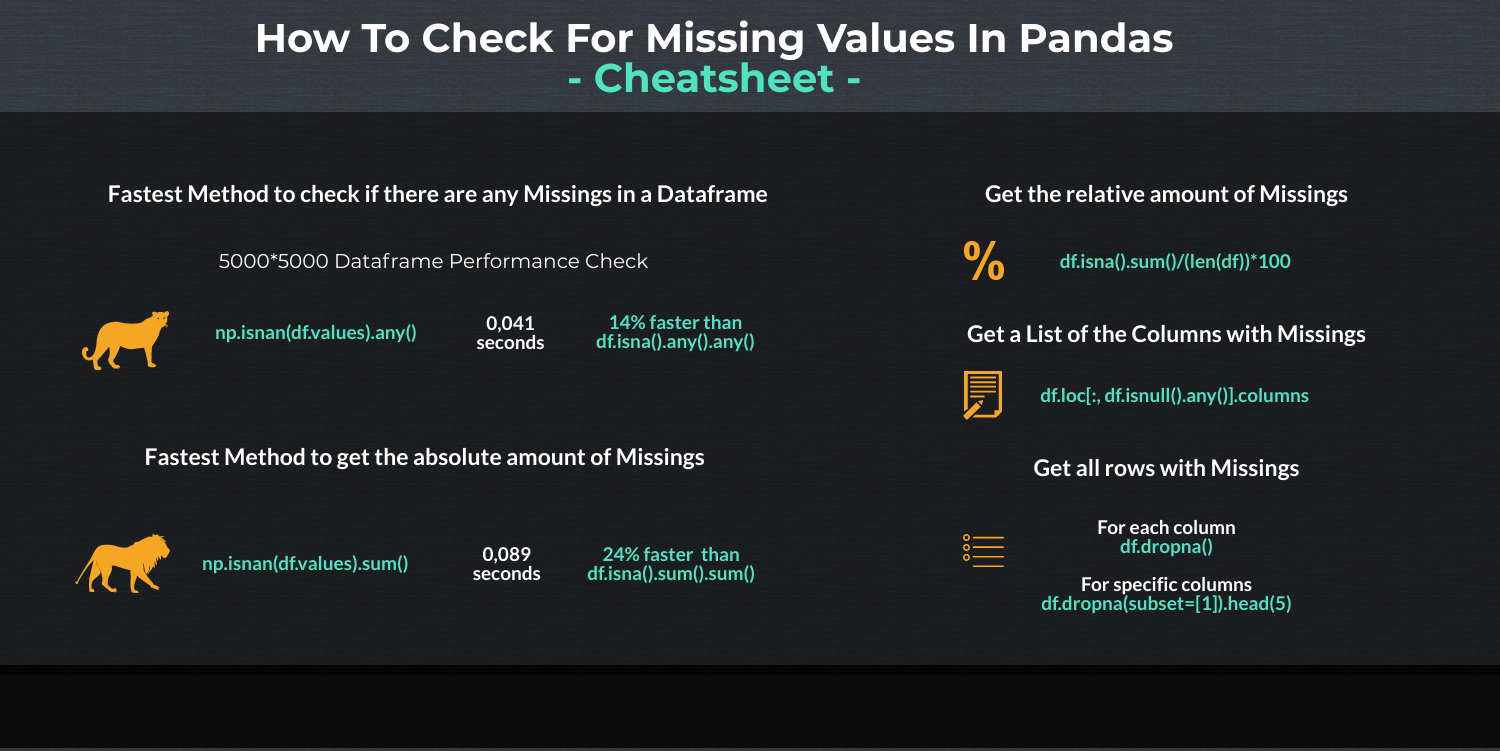

**A) The search for Missings**

**The search for missings is usually one of the first steps in data analysis.**

**At the beginning, the question is whether there are any missings at all and, if so, how many there are. As is offen the case, Pandas offers several ways to determine the number of missings. Depending on how large your dataframe is, there can be real differences in performance.**

First, we simply expect the result true or false to check if there are any missings:

In [ ]:
df.isna().any().any()

This is exactly what we wanted. Now we know that there are missings but how long did the execution take?

%timeit **df.isna().any().any()**

**47.8 ms ± 1.24 ms per loop** (mean ± std. dev. of 7 runs, 10 loops each)

**Let's compare a few methods:**

%timeit **df.isnull().any().any()**

**46.2 ms ± 899 µs per loop** (mean ± std. dev. of 7 runs, 10 loops each)

%timeit **df.isnull().values.any()**

**44.6 ms ± 731 µs per loop** (mean ± std. dev. of 7 runs, 10 loops each)

%timeit **df.isna().values.any()**

**41.8 ms ± 229 µs per loop** (mean ± std. dev. of 7 runs, 10 loops each)

%timeit **np.isnan(df.values).any()**

**41.3 ms ± 368 µs per loop** (mean ± std. dev. of 7 runs, 10 loops each)

> ***We’ve tried five different methods, all of which give the same result. The version with Numpy is 14 % faster than the slowest version.***

**B) The frequency of Missings (absolute)**

In the first step we only wanted to know whether there were any missings at all. Now we also want to know how many Missings are in our dataframe.

In [ ]:
df.isna().sum().sum()

**C) The frequency of Missings (relative)**

Sometimes you may simply want to determine the relative frequency of the missings per column to decide whether to simply drop or substitute the missings:

In [ ]:
df.isna().sum()/(len(df))*100

Now we have a pandas series as a result, which we can process as we like:

In [ ]:
temp = df.isna().sum()/(len(df))*100
print("Column with lowest amount of missings contains {} % missings.".format(temp.min()))
print("Column with highest amount of missings contains {} % missings.".format(temp.max()))

**D) Determine columns with missings**

In certain situations, it may be useful to determine the columns with the missings and process them separately from the other columns:

In [ ]:
df.loc[:, df.isnull().any()].columns

In [ ]:
df.isnull().sum()

**Determine column with most missing data**

In [ ]:
df.count().idxmin()

**5- Remove the 'company' column from the dataframe.**

In [ ]:
# Remove 'company' column
df = df.drop('company', axis=1)

In [ ]:
df.info()

In [ ]:
df.columns

**6- Which countries do most travelers come from? Identify the top 5 countries.**

In [ ]:
# pandas >= 1.1 df.value_counts is available!
# This methos is faster
countries = df.value_counts(subset=['hotel','country']).reset_index(name='count')
countries

In [ ]:
countriesGroupBy = df.groupby(['hotel','country'])['lead_time'].count().sort_values(ascending=False)[0:10]
countriesGroupBy

In [ ]:
i = 0
j = 0
print("For CITY HOTEL: \n")
while i < 5:
    if countries['hotel'][j] == "City Hotel":
        print("The {}st country with most travelers is {} with {} travelers.".format(i+1, countries['country'][j], countries['count'][j]))
        i += 1
        j += 1
    else:
        j += 1
        
i = 0
j = 0
print("\nFor RESORT HOTEL: \n")
while i < 5:
    if countries['hotel'][j] == "Resort Hotel":
        print("The {}st country with most travelers is {} with {} travelers.".format(i+1, countries['country'][j], countries['count'][j]))
        i += 1
        j += 1
    else:
        j += 1

In [ ]:
# Identify the top 5 countries
# Method 1
# countries.sum(axis=1).nlargest(5).to_dict()
# countries.sum(axis=1).nlargest(5).plot.bar(figsize=(12,8))

# Method 2
bar = countries.nlargest(5, 'count')
countries.nlargest(5, 'count').plot.bar(figsize=(12,8))


In [ ]:
plt.figure(figsize=(6, 4), dpi=100)
sns.barplot(x=bar['country'], y=bar['count'], data=countries,
            label="top 5 countries most travelers", color="r")
plt.title("top 5 countries most travelers")

**7- Name the person who has the highest paid Average Daily Rate (ADR). What is the amount?**

In [ ]:
person = df.loc[df['adr'].idxmax()]['name']
adr = df.loc[df['adr'].idxmax()]['adr']
print("{} : who has the highest paid Average Daily Rate (ADR) with the amount {} $".format(person,adr))

**8- Specify the average of total ADRs. (Up to two decimal point)**

In [ ]:
np.round(df['adr'].mean(), 2)

**9- Specify the average number of nights spent(up to two decimal point)**

In [ ]:
weekendNight = df['stays_in_weekend_nights'].mean()
weekNight = df['stays_in_week_nights'].mean()
avgNightSpent = np.round(weekendNight + weekNight / 2, 2)
print("The average number of nights spent is {} .".format(avgNightSpent))

**10- Specify the name and email address of people who had 5 special requests.**

In [ ]:
specialReq = df[['name', 'email', 'total_of_special_requests']]
specialReq.loc[specialReq['total_of_special_requests'] >= 5]

**11- What are the most frequent surnames? (Identify 5 most families)**

In [ ]:
def splitColString(dataFrame, col, delimeter, firstCol, lastCol, dropping = False):
    # new data frame with split value columns
    new = dataFrame[col].str.split(delimeter, n = 1, expand = True)
    
    # making separate firstCol column from new data frame
    dataFrame[firstCol] = new[0]
    
    # making separate lastCol column from new data frame
    dataFrame[lastCol] = new[1]
    
    if dropping :
        # Dropping old column
        dataFrame.drop(columns = [col], inplace = True)
        
    return dataFrame

def printMostFamilies(dataFrame, number):
    i = 0
    print("Most Frequent Surnames: \n")
    while i < number:
        print("The {}st surname with most travelers is {} with {} travelers.".format(i+1, dataFrame['surname'][i], dataFrame['count'][i]))
        i += 1

        
        
# Split name Column to First Name and Surname
newDF = splitColString(df,'name',' ', 'first Name', 'surname', False)

# Frequent Surname
mostSurname = newDF.value_counts(subset='surname').reset_index(name='count')
# mostSurname

# Print Most Surname
printMostFamilies(mostSurname, 5)

**12- Identify the people who have booked the hotel with the largest number of babies and children.**

In [ ]:
df.sort_values(['babies', 'children'], ascending=False)

In [ ]:
# For test
maxChild = df[['babies', 'children']].max()
minChild = df[['babies', 'children']].min()
avg = (maxChild + minChild) / 2
df[df['children'] >= avg[1]][['name','babies', 'children']]

**13- Specify the area code of the most booked areas (3 frequent codes)**

In [ ]:
def printMostAreaCode(dataFrame, number):
    i = 0
    print("Most Frequent Area Code: \n")
    while i < number:
        print("The {}st area code with most booked is {} with {} time.".format(i+1, dataFrame['area-code'][i], dataFrame['count'][i]))
        i += 1

# Split phone-number Column to area-code and phone
df = splitColString(df,'phone-number','-', 'area-code', 'phone', False)
areaCodeCount = df.value_counts(subset='area-code').reset_index(name= 'count')
# areaCodeCount
printMostAreaCode(areaCodeCount, 3)
